# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [20]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [21]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [22]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape

(60000, 784)

In [23]:
x_test.shape

(10000, 784)

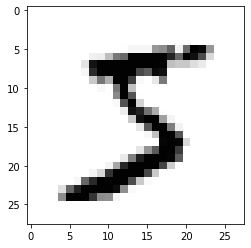

In [24]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [25]:
y_train.shape

(60000,)

In [26]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [27]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [43]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
from tensorflow.keras import layers
model =  keras.Sequential(
    [   
        # layers.Dense(512, activation="relu", name="layer1",),
        # layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(128, activation="relu", name="layer1", input_shape=(784,)),
        layers.Dense(64, activation="relu", name="layer2"),
        layers.Dense(32, activation="relu", name = "layer3"),
        layers.Dense(16, activation="relu", name="layer4"),
        layers.Dense(10, activation="Softmax", name="layer5")
        # layers.Dense(4, activation="relu", name="layer6"),
        # layers.Dense(2, activation="relu", name="layer7"),
        # layers.Dense(1, activation = "Softmax",name="layer8")
      

    ]
)

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [44]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 layer4 (Dense)              (None, 16)                528       
                                                                 
 layer5 (Dense)              (None, 10)                170       
                                                                 
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [45]:
model.fit(x_train,y_train,epochs =20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2767 - accuracy: 0.9193
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1131 - accuracy: 0.9657
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9765
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0616 - accuracy: 0.9806
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9841
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0408 - accuracy: 0.9869
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0315 - accuracy: 0.9899
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0274 - accuracy: 0.9909
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.025

95%이상의 성능을 가진 모델을 만들면 완성!

In [47]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.1057 - accuracy: 0.9770 - 595ms/epoch - 2ms/step

Accuracy: 0.9769999980926514


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)